In [7]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [11]:
import os
print(os.getcwd())
import os

# Load the dataset
bike_data = pd.read_csv("Bicycle_Thefts_Open_Data.csv")

C:\Users\novee\DataWareHousing_FinalProject\DataWareHousing_FinalProject\python_server


In [13]:
bike_data.head().T

,0,1,2,3,4
OBJECTID,1,2,3,4,5
EVENT_UNIQUE_ID,GO-20141263784,GO-20141263544,GO-20141261431,GO-20141267465,GO-20149000074
PRIMARY_OFFENCE,PROPERTY - FOUND,B&E,THEFT UNDER,THEFT UNDER,THEFT UNDER
OCC_DATE,1/1/2014 5:00:00 AM,12/26/2013 5:00:00 AM,1/1/2014 5:00:00 AM,9/30/2013 5:00:00 AM,12/25/2013 5:00:00 AM
OCC_YEAR,2014,2013,2014,2013,2013
OCC_MONTH,January,December,January,September,December
OCC_DOW,Wednesday,Thursday,Wednesday,Monday,Wednesday
OCC_DAY,1,26,1,30,25
OCC_DOY,1,360,1,273,359
OCC_HOUR,18,19,7,0,16


In [ ]:
print(bike_data.info())
def summarize_dataset(data):
    columns_summary = []
    for column in data.columns:
        data_type = data[column].dtype
        missing_values = data[column].isnull().sum()
        unique_values = data[column].nunique()
        columns_summary.append({
            "Column Name": column,
            "Data Type": data_type,
            "Missing Values": missing_values,
            "Unique Values": unique_values
        })
    return pd.DataFrame(columns_summary)

# Generate the summary for the dataset
columns_summary_df = summarize_dataset(bike_data)

# Save the summary as a CSV file for easy review
columns_summary_path = "C:/Users/novee/DataWareHousing_FinalProject/DataWareHousing_FinalProject/python_server/dataset_columns_summary.csv"
columns_summary_df.to_csv(columns_summary_path, index=False)

columns_summary_path



In [ ]:
bike_data.describe().T

In [ ]:
# Separate numerical and categorical columns
numerical_columns = bike_data.select_dtypes(include=['int64', 'float64'])
categorical_columns = bike_data.select_dtypes(include=['object'])

# Count null values in numerical columns
numerical_nulls = numerical_columns.isnull().sum()

# Count null values in categorical columns
categorical_nulls = categorical_columns.isnull().sum()

numerical_nulls, categorical_nulls


In [ ]:
# Unique value counts for categorical columns
categorical_uniques = {col: categorical_columns[col].value_counts() for col in categorical_columns.columns}

# Unique value counts for numerical columns
numerical_uniques = {col: numerical_columns[col].nunique() for col in numerical_columns.columns}

categorical_uniques, numerical_uniques


In [37]:
bike_data.isnull().sum()

OBJECTID                 0
EVENT_UNIQUE_ID          0
PRIMARY_OFFENCE          0
OCC_DATE                 0
OCC_YEAR                 0
OCC_MONTH                0
OCC_DOW                  0
OCC_DAY                  0
OCC_DOY                  0
OCC_HOUR                 0
REPORT_DATE              0
REPORT_YEAR              0
REPORT_MONTH             0
REPORT_DOW               0
REPORT_DAY               0
REPORT_DOY               0
REPORT_HOUR              0
DIVISION                 0
LOCATION_TYPE            0
PREMISES_TYPE            0
BIKE_MAKE              183
BIKE_MODEL           13707
BIKE_TYPE                0
BIKE_SPEED            1135
BIKE_COLOUR           3292
BIKE_COST             2490
STATUS                   0
HOOD_158                 0
NEIGHBOURHOOD_158        0
HOOD_140                 0
NEIGHBOURHOOD_140        0
LONG_WGS84               0
LAT_WGS84                0
x                        0
y                        0
dtype: int64

In [ ]:



def barplots_numerical_bike_data(bike_data, nLower=2, nUpper=1000):
    """
    Generate histograms for numerical columns in bike_data.
    Only columns with unique values between nLower and nUpper are considered.
    """
    # Filter numerical columns
    numerical_columns = bike_data.select_dtypes(include=['int64', 'float64'])
    
    # Further filter based on unique value thresholds
    numerical_columns = numerical_columns[
        [col for col in numerical_columns if numerical_columns.nunique()[col] > nLower and numerical_columns.nunique()[col] < nUpper]
    ]
    
    # Check the number of numerical columns
    _, nCol = numerical_columns.shape
    if nCol == 0:
        print("No numerical columns found with the specified unique value range.")
        return

    # Calculate rows for subplots
    nColumns = 3
    nGraphRow = int((nCol + nColumns - 1) / nColumns)  # Calculate rows needed for a grid of 3 columns
    fig = plt.figure(num=None, figsize=(7 * 6, int(4 * nGraphRow)), dpi=80, facecolor='w', edgecolor='k')

    # Generate histograms for each numerical column
    for i, col in enumerate(numerical_columns.columns):
        plt.subplot(nGraphRow, nColumns, i + 1)
        numerical_columns[col].hist()
        plt.ylabel('Counts')
        plt.title(f'{col}')

    # Adjust layout and display
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.show()

# general view of features
barplots_numerical_bike_data(bike_data, nLower=1, nUpper=1000)


In [ ]:

def barplots_categorical_bike_data(bike_data, nLower=2, nUpper=100):
    """
    Generate bar plots for categorical columns in bike_data.
    Only columns with unique values between nLower and nUpper are considered.
    """
    # Filter categorical columns
    categorical_columns = bike_data.select_dtypes(include=['object'])
    
    # Further filter based on unique value thresholds
    categorical_columns = categorical_columns[
        [col for col in categorical_columns if categorical_columns.nunique()[col] > nLower and categorical_columns.nunique()[col] < nUpper]
    ]
    
    # Check the number of categorical columns
    _, nCol = categorical_columns.shape
    if nCol == 0:
        print("No categorical columns found with the specified unique value range.")
        return

    # Calculate rows for subplots
    nColumns = 3
    nGraphRow = int((nCol + nColumns - 1) / nColumns)  # Calculate rows needed for a grid of 3 columns
    fig = plt.figure(num=None, figsize=(7 * 6, int(4 * nGraphRow)), dpi=80, facecolor='w', edgecolor='k')

    # Generate bar plots for each categorical column
    for i, col in enumerate(categorical_columns.columns):
        plt.subplot(nGraphRow, nColumns, i + 1)
        value_counts = categorical_columns[col].value_counts()
        value_counts.plot.bar()
        plt.ylabel('Counts')
        plt.title(f'{col}')

    # Adjust layout and display
    plt.subplots_adjust(hspace=0.8, wspace=0.5)
    plt.show()

# Apply the function to bike_data
barplots_categorical_bike_data(bike_data, nLower=2, nUpper=100)


In [35]:
# Display the data range of each column
print("")
print("-------------------------------------")
print("-------- Columns Data Range ---------")
print("-------------------------------------")
print("")
for column in bike_data.columns:
    if bike_data[column].dtype in [np.int64, np.float64]:
        min_value = bike_data[column].min()
        max_value = bike_data[column].max()
        print(f"{column}: Min: {min_value}, Max: {max_value}")
    else:
        unique_values = bike_data[column].unique()
        print(f"Unique values in column '{column}':")
        print(unique_values)

    print("")


-------------------------------------
-------- Columns Data Range ---------
-------------------------------------

OBJECTID: Min: 1, Max: 37178

Unique values in column 'EVENT_UNIQUE_ID':
['GO-20141263784' 'GO-20141263544' 'GO-20141261431' ... 'GO-20242142612'
 'GO-20242146623' 'GO-20249052489']

Unique values in column 'PRIMARY_OFFENCE':
['PROPERTY - FOUND' 'B&E' 'THEFT UNDER' 'THEFT FROM MOTOR VEHICLE UNDER'
 'PROPERTY - LOST' "B&E W'INTENT" 'THEFT UNDER - BICYCLE' 'MISCHIEF UNDER'
 'POSSESSION PROPERTY OBC UNDER' 'THEFT OVER' 'INCIDENT - BICYCLE'
 'FRAUD UNDER' 'THEFT UNDER - SHOPLIFTING' 'FTC PROBATION ORDER'
 'INCIDENT' 'PROPERTY - RECOVERED' 'ROBBERY - MUGGING'
 'CARELESS DRIVING- HTA' 'ROBBERY WITH WEAPON' 'ROBBERY - OTHER'
 'THEFT OF MOTOR VEHICLE' 'THEFT FROM MOTOR VEHICLE OVER'
 'POSSESSION PROPERTY OBC OVER' 'SUSPICIOUS INCIDENT'
 'UNLAWFULLY IN DWELLING-HOUSE' 'FRAUD OVER' 'INTIMATE PARTNER INCIDENT'
 'MISCHIEF - ENDANGER LIFE' 'MISCHIEF - INTERFERE W-PROP'
 'ROBBERY - SWA

In [ ]:
# Group data by hour and count occurrences
hourly_trend = bike_data['OCC_HOUR'].value_counts().sort_index()

# Plot the trend
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(hourly_trend.index, hourly_trend.values, marker='o')
plt.title('Thefts by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Thefts')
plt.grid(True)
plt.show()


In [ ]:
# Group data by month and count occurrences
monthly_trend = bike_data['OCC_MONTH'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(10, 6))
monthly_trend.plot(kind='bar', color='skyblue')
plt.title('Thefts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Thefts')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Group data by location type and recovery status
recovery_trend = bike_data.groupby(['LOCATION_TYPE', 'STATUS']).size().unstack()

# Plot recovery rates
recovery_trend.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Recovery Rates by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Number of Bikes')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Calculate recovery rates by bike type
recovery_by_bike_type = bike_data.groupby(['BIKE_TYPE', 'STATUS']).size().unstack()
recovery_by_bike_type['Recovery Rate'] = recovery_by_bike_type['RECOVERED'] / recovery_by_bike_type.sum(axis=1)

# Plot recovery rates
recovery_by_bike_type['Recovery Rate'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Bike Recovery Rates by Bike Type')
plt.ylabel('Recovery Rate')
plt.xlabel('Bike Type')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Calculate recovery rates by hour of occurrence
recovery_by_hour = bike_data.groupby(['OCC_HOUR', 'STATUS']).size().unstack()
recovery_by_hour['Recovery Rate'] = recovery_by_hour['RECOVERED'] / recovery_by_hour.sum(axis=1)

# Plot recovery rates
recovery_by_hour['Recovery Rate'].plot(kind='line', marker='o', figsize=(10, 6), color='blue')
plt.title('Bike Recovery Rates by Hour of the Day')
plt.ylabel('Recovery Rate')
plt.xlabel('Hour of the Day')
plt.grid(True)
plt.show()


In [ ]:
# Calculate recovery rates by premises type
if 'PREMISES_TYPE' in bike_data.columns and 'STATUS' in bike_data.columns:
    # Group data by premises type and status
    recovery_by_premises = bike_data.groupby(['PREMISES_TYPE', 'STATUS']).size().unstack()

    # Add a recovery rate column
    recovery_by_premises['Recovery Rate'] = (
        recovery_by_premises['RECOVERED'] / recovery_by_premises.sum(axis=1)
    )

    # Sort by recovery rate
    recovery_by_premises = recovery_by_premises.sort_values(by='Recovery Rate', ascending=False)

    # Plot recovery rates
    recovery_by_premises['Recovery Rate'].plot(
        kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black'
    )
    plt.title('Bike Recovery Rates by Premises Type')
    plt.xlabel('Premises Type')
    plt.ylabel('Recovery Rate')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Display the table of recovery rates
    recovery_by_premises
else:
    print("The required columns 'PREMISES_TYPE' and/or 'STATUS' are missing from the dataset.")


In [ ]:
# Calculate recovery rates by neighbourhood_158
if 'NEIGHBOURHOOD_158' in bike_data.columns and 'STATUS' in bike_data.columns:
    # Group data by neighborhood and status
    recovery_by_neighbourhood = bike_data.groupby(['NEIGHBOURHOOD_158', 'STATUS']).size().unstack()

    # Add a recovery rate column
    recovery_by_neighbourhood['Recovery Rate'] = (
        recovery_by_neighbourhood['RECOVERED'] / recovery_by_neighbourhood.sum(axis=1)
    )

    # Sort by recovery rate
    recovery_by_neighbourhood = recovery_by_neighbourhood.sort_values(by='Recovery Rate', ascending=False)

    # Plot recovery rates
    top_neighbourhoods = recovery_by_neighbourhood['Recovery Rate'].head(20)  # Show top 20 neighborhoods
    top_neighbourhoods.plot(
        kind='bar', figsize=(12, 6), color='purple', edgecolor='black'
    )
    plt.title('Top 20 Neighbourhoods by Bike Recovery Rates')
    plt.xlabel('Neighbourhood')
    plt.ylabel('Recovery Rate')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Display the table of recovery rates
    recovery_by_neighbourhood.head(20)
else:
    print("The required columns 'NEIGHBOURHOOD_158' and/or 'STATUS' are missing from the dataset.")


In [15]:
# Replace values in the target column (STATUS) to consolidate categories
if 'STATUS' in bike_data.columns:
    bike_data['STATUS'] = bike_data['STATUS'].replace({
        'STOLEN': 'NOT RECOVERED',
        'UNKNOWN': 'NOT RECOVERED',
        'RECOVERED': 'RECOVERED'
    })

    # Verify the changes
    status_counts = bike_data['STATUS'].value_counts()
    print("Updated 'STATUS' column value counts:")
    print(status_counts)
else:
    print("The 'STATUS' column is missing from the dataset.")


Updated 'STATUS' column value counts:
STATUS
NOT RECOVERED    36789
RECOVERED          389
Name: count, dtype: int64


In [25]:
from sklearn.preprocessing import LabelEncoder

# List categorical columns
categorical_columns = bike_data.select_dtypes(include=['object']).columns

# Create a copy of bike_data for encoding
label_encoded_data = bike_data.copy()

# Encode each categorical column
for col in categorical_columns:
    encoder = LabelEncoder()
    label_encoded_data[col] = encoder.fit_transform(label_encoded_data[col].astype(str))


In [27]:
# Select numerical columns
numerical_columns = bike_data.select_dtypes(include=['int64', 'float64'])

# Combine numerical and encoded categorical data
combined_data = pd.concat([numerical_columns, label_encoded_data[categorical_columns]], axis=1)
# Compute correlation matrix
correlation_matrix = combined_data.corr()

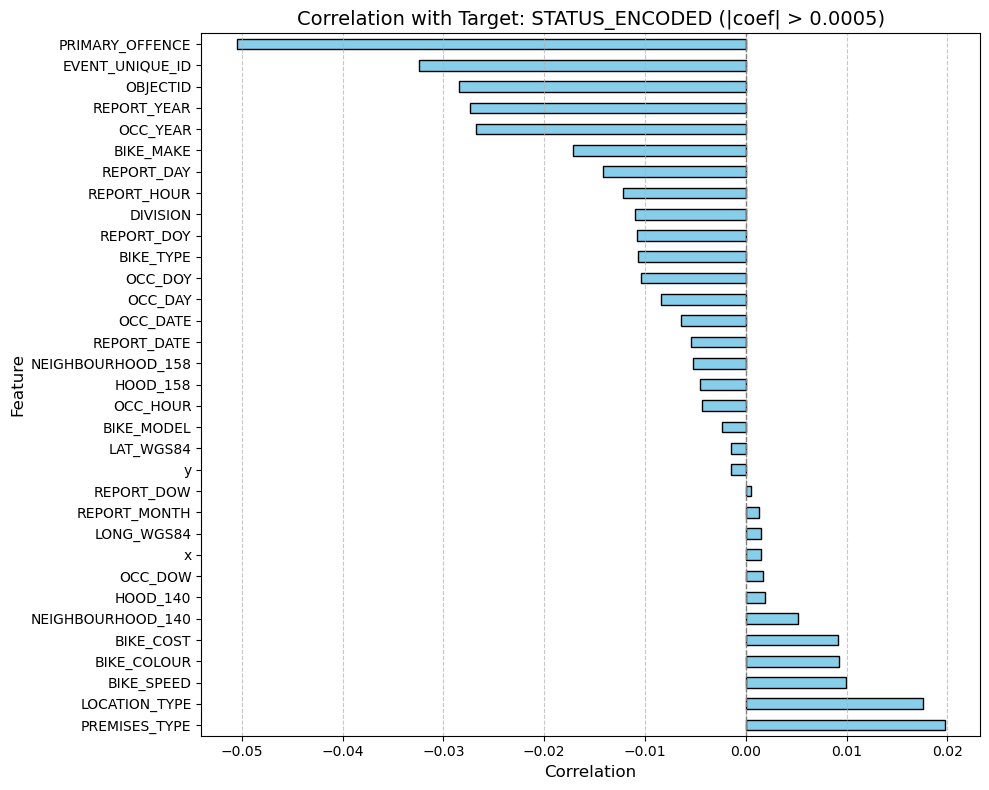

In [31]:


# Calculate correlation with the target (STATUS)
target_correlation = correlation_matrix['STATUS'].drop('STATUS').sort_values(ascending=False)

# Filter correlations based on threshold
correlation_threshold = 0.0005  # Adjust threshold as needed
filtered_correlation = target_correlation[target_correlation.abs() > correlation_threshold]

# Plot the filtered correlation as a horizontal bar chart
plt.figure(figsize=(10, 8))
filtered_correlation.plot(kind='barh', color='skyblue', edgecolor='black')

# Plot configurations
plt.title('Correlation with Target: STATUS_ENCODED (|coef| > 0.0005)', fontsize=14)
plt.xlabel('Correlation', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [33]:
# Filter correlations related to the target variable (STATUS_ENCODED)
status_correlation = correlation_matrix['STATUS'].sort_values(ascending=False)

# Display the top correlations with STATUS_ENCODED
print("Top correlations with STATUS:")
print(status_correlation)


Top correlations with STATUS:
STATUS               1.000000
PREMISES_TYPE        0.019729
LOCATION_TYPE        0.017586
BIKE_SPEED           0.009950
BIKE_COLOUR          0.009203
BIKE_COST            0.009172
NEIGHBOURHOOD_140    0.005188
HOOD_140             0.001896
OCC_DOW              0.001697
x                    0.001507
LONG_WGS84           0.001507
REPORT_MONTH         0.001354
REPORT_DOW           0.000565
OCC_MONTH            0.000265
y                   -0.001499
LAT_WGS84           -0.001501
BIKE_MODEL          -0.002321
OCC_HOUR            -0.004367
HOOD_158            -0.004560
NEIGHBOURHOOD_158   -0.005209
REPORT_DATE         -0.005431
OCC_DATE            -0.006463
OCC_DAY             -0.008418
OCC_DOY             -0.010358
BIKE_TYPE           -0.010667
REPORT_DOY          -0.010796
DIVISION            -0.010989
REPORT_HOUR         -0.012197
REPORT_DAY          -0.014144
BIKE_MAKE           -0.017098
OCC_YEAR            -0.026760
REPORT_YEAR         -0.027345
OBJECTID  

In [ ]:
# Perform analysis on the 'PRIMARY_OFFENCE' column in the bike_data DataFrame

# Step 1: Analyze unique values and their counts
primary_offence_counts = bike_data['PRIMARY_OFFENCE'].value_counts()

# Step 2: Define a threshold for rare categories and group them as 'Others'
rare_threshold = 5
rare_categories = primary_offence_counts[primary_offence_counts < rare_threshold].index

# Replace rare categories with 'Others'
bike_data['PRIMARY_OFFENCE'] = bike_data['PRIMARY_OFFENCE'].apply(
    lambda x: x if x not in rare_categories else 'Others'
)

# Step 3: Recalculate counts after grouping
updated_offence_counts = bike_data['PRIMARY_OFFENCE'].value_counts()

# Step 4: Calculate cumulative percentage to identify dominant categories
primary_offence_percentage = updated_offence_counts.cumsum() / updated_offence_counts.sum() * 100
dominant_categories = primary_offence_percentage[primary_offence_percentage <= 90].index

# Filter the dataset to include only dominant categories
filtered_data = bike_data[bike_data['PRIMARY_OFFENCE'].isin(dominant_categories)]

# Save results for review
updated_offence_counts_path = "C:/Users/novee/DataWareHousing_FinalProject/DataWareHousing_FinalProject/python_server/updated_primary_offence_counts.csv"
filtered_data_path = "C:/Users/novee/DataWareHousing_FinalProject/DataWareHousing_FinalProject/python_server/filtered_bike_data.csv"

updated_offence_counts.to_csv(updated_offence_counts_path)
filtered_data.to_csv(filtered_data_path, index=False)

updated_offence_counts_path, filtered_data_path
# Show the top 10 categories after grouping rare ones as 'Others'
print("Updated Primary Offence Counts (Top 10):")
print(updated_offence_counts.head(10))

# Display the total number of categories after grouping
print(f"\nTotal Number of Categories After Grouping: {len(updated_offence_counts)}")
print("\nDominant Categories (90% Coverage):")
print(dominant_categories)
print("\nFiltered Dataset Information:")
print(filtered_data.info())

# Display the first few rows of the filtered dataset
print("\nSample Rows from the Filtered Dataset:")
print(filtered_data.head())


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def imp_features(df):
    
   return [
        'BIKE_TYPE',          # Type of bicycle
        'BIKE_COST',          # Cost of bicycle
        'LOCATION_TYPE',      # Where the theft occurred
        'PREMISES_TYPE',      # Type of premises
        'HOOD_158',           # Neighborhood
        'STATUS'              # Target variable
    ]
def handle_missing_values(df):
    
    # Fill missing values in BIKE_COST with median
    df['BIKE_COST'] = df['BIKE_COST'].fillna(df['BIKE_COST'].median())
    
    # Fill categorical missing values with 'Unknown'
    categorical_columns = ['BIKE_TYPE', 'LOCATION_TYPE', 'PREMISES_TYPE', 'HOOD_158']
    for col in categorical_columns:
        df[col] = df[col].fillna('Unknown')
    
    return df
def encode_categories(df):
    """
    Converts categorical variables to numbers using simple label encoding.
    """
    from sklearn.preprocessing import LabelEncoder
    
    # Columns that need to be encoded
    categorical_columns = ['BIKE_TYPE', 'LOCATION_TYPE', 'PREMISES_TYPE', 'HOOD_158']
    
    # Create a label encoder for each categorical column
    encoders = {}
    for column in categorical_columns:
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])
        encoders[column] = encoder
    
    return df, encoders
def scale_features(df):
    """
    Standardizes numerical features by removing the mean and scaling to unit variance.
    """
    from sklearn.preprocessing import StandardScaler
    
    # Select numerical columns
    numerical_columns = ['BIKE_COST']
    
    # Create a StandardScaler object
    scaler = StandardScaler()
    
    # Standardize the numerical columns
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    
    return df, scaler
def handle_class_imbalance(X_train, y_train, method='undersampling'):
    """
    Handles class imbalance using either undersampling or class weights.
    
    Parameters:
        X_train: Training features
        y_train: Target variable
        method: 'undersampling' or 'class_weights'
        
    Returns:
        X_balanced: Balanced features
        y_balanced: Balanced target
    """
    if method == 'undersampling':
        # Convert to DataFrame for easier manipulation
        X_train_df = pd.DataFrame(X_train)
        
        # Separate majority (stolen) and minority (recovered) classes
        stolen_cases = X_train_df[y_train == 0]
        recovered_cases = X_train_df[y_train == 1]
        
        # Undersample majority class to match minority class size
        stolen_cases_undersampled = resample(
            stolen_cases,
            replace=False,
            n_samples=len(recovered_cases),
            random_state=42
        )
        
        # Combine minority class with undersampled majority class
        X_balanced = pd.concat([stolen_cases_undersampled, recovered_cases])
        y_balanced = np.array([0] * len(recovered_cases) + [1] * len(recovered_cases))
        
        print(f"Original dataset shape: {len(y_train)}")
        print(f"Balanced dataset shape: {len(y_balanced)}")
        
        return X_balanced, y_balanced
    
    return X_train, y_train

    
class BikeTheftModeler:
    """
    A modeler for bicycle theft prediction that handles class imbalance.
    Provides options for both undersampling and class weights approaches.
    """
    def __init__(self):
        self.best_model = None
        self.training_method = None
    
    def train_model(self, X_train, y_train, balance_method='undersampling'):
        """
        Trains models using specified class imbalance handling method
        
        Parameters:
            X_train: Training features
            y_train: Training target
            balance_method: How to handle class imbalance ('undersampling' or 'class_weights')
        """
        print("\nStarting model training...")
        print(f"Original class distribution:\n{pd.Series(y_train).value_counts(normalize=True)}")
        
        # Handle class imbalance
        if balance_method == 'undersampling':
            X_balanced, y_balanced = handle_class_imbalance(X_train, y_train, 'undersampling')
            class_weights = None
            self.training_method = 'undersampling'
        else:
            X_balanced, y_balanced = X_train, y_train
            class_weights = 'balanced'
            self.training_method = 'class_weights'
        
        # Create and train model
        model = RandomForestClassifier(
            n_estimators=100,
            class_weight=class_weights,
            random_state=42
        )
        
        print(f"\nTraining with {self.training_method}...")
        model.fit(X_balanced, y_balanced)
        self.best_model = model
        
        return model
    
    def evaluate_model(self, model, X_test, y_test):
        """
        Evaluates model with metrics suitable for imbalanced classification
        """
        # Make predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        
        # Calculate metrics
        print("\nModel Performance:")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        
        print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
        
        # Calculate and display feature importance
        feature_importance = pd.DataFrame({
            'feature': X_test.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print("\nFeature Importance:")
        print(feature_importance)    
        
        
def main():
    # Load and preprocess data
    bike_data = pd.read_csv("Bicycle_Thefts_Open_Data.csv")
    preprocessor = BikeTheftPreprocessor()
    processed_df = preprocessor.preprocess(bike_data)
    
    # Prepare features and target
    X = processed_df.drop(['STATUS', 'TARGET'], axis=1)
    y = processed_df['TARGET']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Train and evaluate model using undersampling
    modeler = BikeTheftModeler()
    
    # Try both methods and compare
    print("\n=== Training with Undersampling ===")
    model_undersampled = modeler.train_model(X_train, y_train, 'undersampling')
    modeler.evaluate_model(model_undersampled, X_test, y_test)
    
    print("\n=== Training with Class Weights ===")
    model_weighted = modeler.train_model(X_train, y_train, 'class_weights')
    modeler.evaluate_model(model_weighted, X_test, y_test)
    
    return preprocessor, modeler

if __name__ == "__main__":
    preprocessor, modeler = main()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_curve, auc, classification_report
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

## 4 - Model scoring and evaluation
df = pd.read_csv('Bicycle_Thefts_Open_Data.csv')
df = df.sample(n=10000, random_state=42)

df = df.dropna()  # Drop missing values for simplicity
X = df.drop(columns=['STATUS'])  
y = df['STATUS'] 

# Convert the target variable to binary (0 for 'STOLEN', 1 for 'RECOVERED')
y = (y == 'RECOVERED').astype(int)

# Convert categorical columns to numerical
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Apply scaling
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(max_iter=500, solver='lbfgs', class_weight='balanced')
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
log_reg_cv = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy')
log_reg_cv.fit(X_train_smote_scaled, y_train_smote)

# Decision Tree
tree_clf = DecisionTreeClassifier(class_weight='balanced')
tree_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
tree_cv = GridSearchCV(tree_clf, tree_params, cv=5, scoring='accuracy')
tree_cv.fit(X_train_smote_scaled, y_train_smote)


# Step 4: Evaluate models
models = {
    "Logistic Regression": log_reg_cv.best_estimator_,
    "Decision Tree": tree_cv.best_estimator_
}

results = {}
plt.figure(figsize=(10, 8))  # For ROC curve plotting

for model_name, model in models.items():
    # Predict using the appropriate scaled or unscaled data
    X_test_input = X_test_scaled if model_name == "Logistic Regression" else X_test
    y_pred = model.predict(X_test_input)
    y_proba = model.predict_proba(X_test_input)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": confusion
    }

    # Print classification report
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Plot ROC curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Finalize ROC plot
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Step 5: Recommend best model
best_model = max(results, key=lambda k: results[k]['F1-Score'])
print(f"\nBest model based on F1-Score: {best_model}")

In [ ]:
## 5 - Deploying the model (Benjamin Lefebvre - 301234587)

# a) Using a flask framework arrange to turn your selected machine-learning model into an API.
# b) Using the pickle module, arrange for Serialization & Deserialization of your model.

from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Save the model


# Load the model


# API Routes
# Get options of the location names in the dataset ,the bike_type,the bike cost ,premises, neighbourhood
@app.route('/options', methods=['GET'])
def get_options():
    options = {
        'DIVISION': bike_data['DIVISION'].unique().tolist(),
        'LOCATION_TYPE': bike_data['LOCATION_TYPE'].unique().tolist(),
        'PREMISES_TYPE': bike_data['PREMISES_TYPE'].unique().tolist(),
        'NEIGHBOURHOOD_158': bike_data['NEIGHBOURHOOD_158'].unique().tolist(),
    }
    return jsonify(options)

# Predict the status of a bike theft
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    
    # Convert the input data into a DataFrame
    input_data = pd.DataFrame(data, index=[0])
    
    # Preprocess the input data
    input_data = preprocessor.preprocess(input_data)
    
    # Make predictions
    prediction = modeler.best_model.predict(input_data)
    
    return jsonify({'prediction': prediction[0]})

# Run the app
if __name__ == '__main__':
    app.run(debug=True, port=5001)